특정 분기(계절)에 특정 범죄 유형이 증가하는가?(카이제곱-독립성 검정)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency
from math import sqrt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/chicago_crime_final.csv')

In [ ]:
# 날짜 데이터를 datetime 형식으로 변환
df['F_Date']  = pd.to_datetime(df['F_Date'])

# 분기(Quarter) 컬럼 생성
df['Quarter'] = df['F_Date'].dt.quarter

In [ ]:
# 범죄 유형별 분기별 발생 횟수 계산
obs = df.pivot_table(index='Primary Type', columns='Quarter', aggfunc='size', fill_value=0)
print(obs)

Quarter                                 1       2       3       4
Primary Type                                                     
ARSON                                3130    3836    3924    3291
ASSAULT                            124077  149913  152267  124686
BATTERY                            340343  413969  412267  341892
BURGLARY                            93245  107183  122543  116537
CONCEALED CARRY LICENSE VIOLATION     365     359     429     335
CRIM SEXUAL ASSAULT                  6528    6985    7644    6175
CRIMINAL DAMAGE                    207509  248537  256474  229045
CRIMINAL SEXUAL ASSAULT              2621    2497    2793    2401
CRIMINAL TRESPASS                   57262   55903   56974   53360
DECEPTIVE PRACTICE                  96091   92379   94259   95328
DOMESTIC VIOLENCE                       1       0       0       0
GAMBLING                             1498    4756    5997    2402
HOMICIDE                             2412    3553    4019    3093
HUMAN TRAF

In [ ]:
# 2) 카이제곱 독립성 검정
chi2, p, dof, expected = chi2_contingency(obs)

print("== 카이제곱 검정 결과 ==")
print(f"Chi2 통계량: {chi2:.4f}")
print(f"p-value: {p:.4f}")
print(f"자유도(df): {dof}")

== 카이제곱 검정 결과 ==
Chi2 통계량: 30497.4961
p-value: 0.0000
자유도(df): 105


-Chi2 통계량: 30497.4961

값이 크다는 것은 관측값과 기대값 사이의 차이가 크다는 것을 의미합니다. 즉, 분기별 범죄 유형의 발생 횟수에 차이가 있다는 것을 나타냅니다.


-p-value: 0.0000

범죄 유형과 분기 간에 유의미한 관계가 있다는 결론을 내릴 수 있습니다.

-0.0000으로 나온 이유

카이제곱 검정은 표본 크기가 클수록 작은 차이도 유의미하게 감지합니다.

시카고 범죄 데이터는 수십만 건 이상이라 p-value가 0에 가깝게 나올 가능성이 높아요.


-자유도(df): 105

자유도 105는 통계적으로 검정할 수 있는 충분한 변수를 갖춘 상황을 의미합니다.

In [ ]:
df_expected = pd.DataFrame(expected,
                           index=obs.index,
                           columns=obs.columns)
print("\n[기대도수(Expected Frequencies)]")
print(df_expected)


[기대도수(Expected Frequencies)]
Quarter                                        1              2  \
Primary Type                                                      
ARSON                                3297.423049    3638.686910   
ASSAULT                            128107.478111  141365.847407   
BATTERY                            350755.732651  387056.884656   
BURGLARY                           102196.164557  112772.865545   
CONCEALED CARRY LICENSE VIOLATION     345.995734     381.804254   
CRIM SEXUAL ASSAULT                  6355.346364    7013.087273   
CRIMINAL DAMAGE                    218936.473697  241595.108956   
CRIMINAL SEXUAL ASSAULT              2397.787637    2645.944532   
CRIMINAL TRESPASS                   51968.884713   57347.358129   
DECEPTIVE PRACTICE                  87907.331343   97005.222270   
DOMESTIC VIOLENCE                       0.232524       0.256589   
GAMBLING                             3407.174384    3759.796861   
HOMICIDE                        

In [ ]:
# 유의수준 설정 (예: 0.05)
alpha = 0.05
if p < alpha:
    print("\n=> 귀무가설 기각: 통계적으로 유의한 연관성이 있다고 판단합니다.")
else:
    print("\n=> 귀무가설 채택: 유의한 연관성을 찾지 못했습니다.")



=> 귀무가설 기각: 통계적으로 유의한 연관성이 있다고 판단합니다.


표준화 잔차(Standardized Residuals)의 값이 크면(양수) → 범죄가 예상보다 증가,

반대로 값이 작으면(음수) → 범죄가 예상보다 감소한 것을 의미합니다.

In [ ]:
# 3) 잔차(Residual) 분석
std_res = (obs - expected) / np.sqrt(expected)
df_std_res = pd.DataFrame(std_res,
                          index=obs.index,
                          columns=obs.columns)
print("\n== 표준화 잔차(standardized residuals) ==")
print(df_std_res)


== 표준화 잔차(standardized residuals) ==
Quarter                                    1          2          3          4
Primary Type                                                                 
ARSON                              -2.915600   3.271023   1.491634  -2.092041
ASSAULT                           -11.260802  22.732605   8.821851 -21.750259
BATTERY                           -17.581759  43.257402   7.334137 -35.153033
BURGLARY                          -28.000272 -16.645585  10.995569  33.057668
CONCEALED CARRY LICENSE VIOLATION   1.021682  -1.167066   1.343880  -1.223081
CRIM SEXUAL ASSAULT                 2.165739  -0.335394   3.013501  -4.975272
CRIMINAL DAMAGE                   -24.422559  14.123220   4.095505   5.083177
CRIMINAL SEXUAL ASSAULT             4.558405  -2.895571   0.127422  -1.625741
CRIMINAL TRESPASS                  23.218794  -6.031401 -13.895971  -1.870964
DECEPTIVE PRACTICE                 27.601678 -14.853505 -24.689415  14.365897
DOMESTIC VIOLENCE         

표준화 잔차(standardized residuals) 값이 ±1.96을 초과하면, 해당 분기에서 범죄 발생 빈도가 유의미하게 증가하거나 감소했다는 의미입니다.

잔차 > +1.96 → 해당 분기에 범죄가 증가

잔차 < -1.96 → 해당 분기에 범죄가 감소

-1.96 ≤ 잔차 ≤ +1.96 → 통계적으로 유의미한 변화 없음 (평균적인 범위

In [ ]:
# 특정 기준(예: ±1.96) 이상이면 통계적으로 유의하게 기대보다 많거나 적다는 해석 가능
sig_mask = np.abs(std_res) > 1.96
df_sig_mask = pd.DataFrame(sig_mask,
                           index=obs.index,
                           columns=obs.columns)
print("\n[잔차 > ±1.96 여부]")
print(df_sig_mask)


[잔차 > ±1.96 여부]
Quarter                                1      2      3      4
Primary Type                                                 
ARSON                               True   True  False   True
ASSAULT                             True   True   True   True
BATTERY                             True   True   True   True
BURGLARY                            True   True   True   True
CONCEALED CARRY LICENSE VIOLATION  False  False  False  False
CRIM SEXUAL ASSAULT                 True  False   True   True
CRIMINAL DAMAGE                     True   True   True   True
CRIMINAL SEXUAL ASSAULT             True   True  False  False
CRIMINAL TRESPASS                   True   True   True  False
DECEPTIVE PRACTICE                  True   True   True   True
DOMESTIC VIOLENCE                  False  False  False  False
GAMBLING                            True   True   True   True
HOMICIDE                            True   True   True  False
HUMAN TRAFFICKING                  False  False  Fals

In [ ]:
# 4) 효과크기: Cramer's V
n = obs.values.sum()
phi2 = chi2 / n
r, c = obs.shape
k = min(r-1, c-1)  # 독립성 검정에서는 (행-1, 열-1) 중 작은 값
cramers_v = sqrt(phi2 / k)

print(f"\n== Cramer's V (효과크기) ==")
print(f"Cramer's V: {cramers_v:.4f}")


== Cramer's V (효과크기) ==
Cramer's V: 0.0350


Cramér's V는 두 범주형 변수 간 관계의 강도를 나타내는 지표입니다.

Cramér's V 값은 0과 1 사이이며, 0은 관계가 없고, 1은 완전한 관계를 의미합니다.

Cramér's V = 0.0350은 약한 관계를 의미합니다. 즉, 범죄 유형과 분기 간에 유의미한 관계가 있지만 그 관계는 매우 약하다는 것을 나타냅니다.

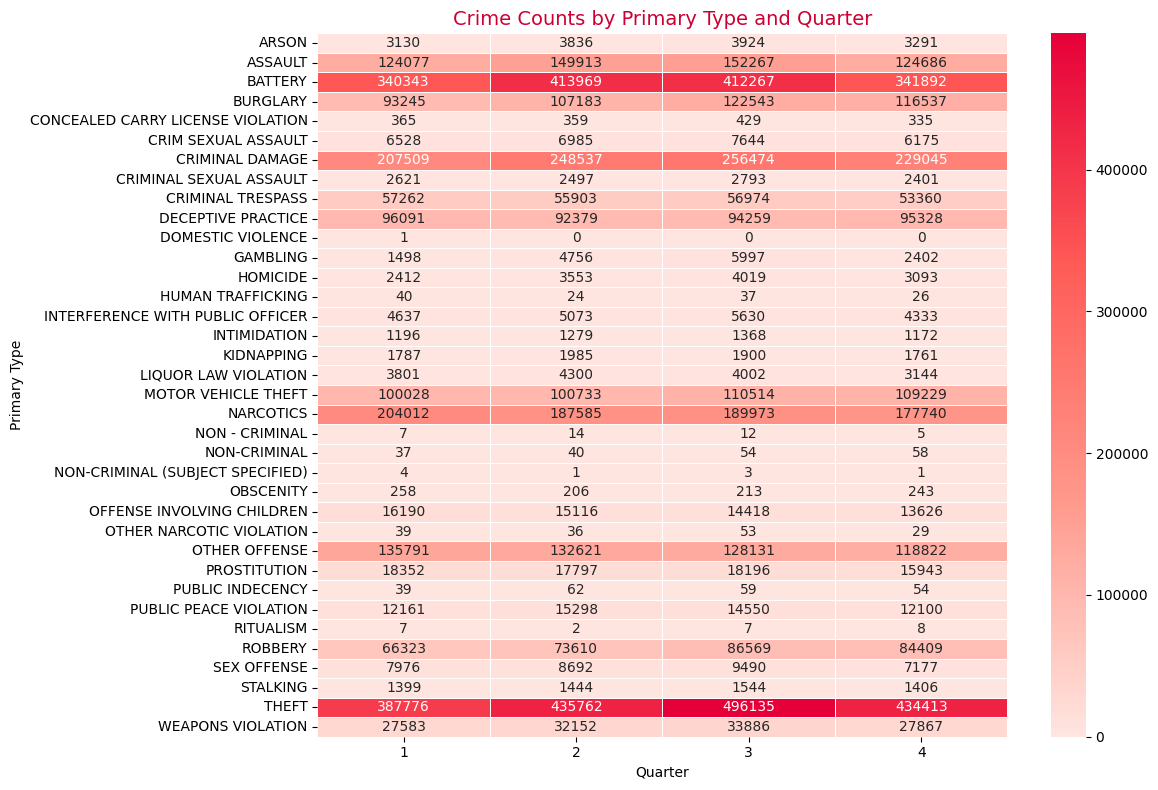

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
# Quarter별 Primary Type 빈도수 테이블
heatmap_data = pd.crosstab(df['Primary Type'], df['Quarter'])

# 진한 코랄핑크 컬러맵
coral_deep_cmap = LinearSegmentedColormap.from_list(
    "deep_coral",
    ['#ffe5e0', '#ff998c', '#ff5c57', '#e60039']
)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap=coral_deep_cmap,
    linewidths=0.5,
    linecolor='white'
)
plt.title('Crime Counts by Primary Type and Quarter', fontsize=14, color='#cc0033')
plt.xlabel('Quarter')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

👉 "계절이 범죄 발생에 영향을 주긴 하지만, 엄청 미세한 수준!"

👉 "실제로 큰 패턴을 분석하기에는 부족한 연관성!"